### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
%tensorflow_version  2.x
import tensorflow as tf
import numpy as np
tf.__version__

TensorFlow 2.x selected.


'2.1.0-rc1'

#### Collect Fashion mnist data from tf.keras.datasets 

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 720x720 with 0 Axes>

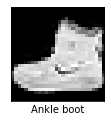

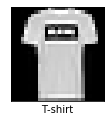

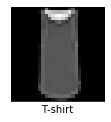

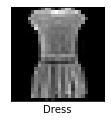

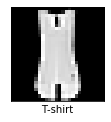

In [5]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.figure(figsize=(10,10))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

#### Change train and test labels into one-hot vectors

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
x_train_norm = x_train/np.float32(255)

x_test_norm = x_test/np.float32(255)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model1 = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model1.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model1.add(tf.keras.layers.BatchNormalization())


#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
#Add first convolutional layer
model1.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model1.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#Add a dropout layer
model1.add(tf.keras.layers.Dropout(0.25))
#Flatten the output
model1.add(tf.keras.layers.Flatten())

#Dense layer
model1.add(tf.keras.layers.Dense(200, activation='relu'))

#Dense layer
model1.add(tf.keras.layers.Dense(100, activation='relu'))



### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [17]:
#Output layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
model1.fit(x_train_norm,trainY,          
          validation_data=(x_test_norm,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.3634 - accuracy: 0.8670 - val_loss: 0.2942 - val_accuracy: 0.8925
Epoch 2/5
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.2338 - accuracy: 0.9136 - val_loss: 0.2438 - val_accuracy: 0.9085
Epoch 3/5
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.1841 - accuracy: 0.9304 - val_loss: 0.2537 - val_accuracy: 0.9089
Epoch 4/5
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.1474 - accuracy: 0.9450 - val_loss: 0.2405 - val_accuracy: 0.9195
Epoch 5/5
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.1182 - accuracy: 0.9549 - val_loss: 0.2403 - val_accuracy: 0.9217


In [18]:
score = model1.evaluate(x_test_norm, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24025513577461244
Test accuracy: 0.9217


In [0]:
x_train_reshaped = tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,))

In [0]:
predictions = model1.predict(x_train_norm)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

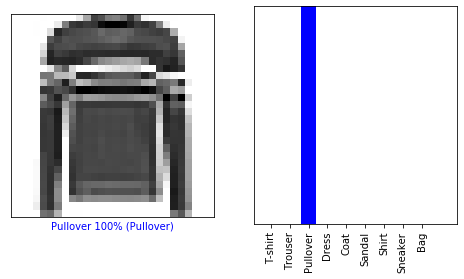

In [21]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()